## Gradient descent

Gradient descent is an interative method to find local minimum of functions that are differentiable. At each iteration it takes a step proportional to the negative of the gradient of the function at the actual point, using the formula:

$x_{n+1} = x_{n} - \gamma \nabla f(x_{n})$

where $\nabla f(x_{n})$ is the gradient of the function at the actual point and $\gamma$ is a positive real number to control the length of the step. The method stops when $F(x_{n+1})$ and $F(x_{n})$ are _close enough_ So let's make a function that implements a very simple version of gradient descent and returns the path that the algorithm takes:

In [2]:
def next_step(gamma,d_function,x):
    return x - gamma*(d_function(x))
    

def gradient_descent1d(gamma,function,d_function,x_0 = 0,max_steps = 500):
    x_iters = []
    x_n = x_0
    x_n_1 = next_step(gamma,d_function, x_n )
    tol = 10**-4
    i = 0 
    while abs(function(x_n_1)-function(x_n))>tol and i<max_steps and function(x_n_1)!=float("inf") :
        x_iters.append(x_n)
        x_n = x_n_1
        x_n_1 = next_step(gamma,d_function, x_n )
        i+=1
        
    if i>=max_steps or function(x_n_1)==float("inf"):
        print("The algorithm didn't converge")
        
    return x_iters

### Function in one variable

Let's try the method with the function $f(x) = x^2 + 30x + 10$ whose gradient is $\nabla f(x) = 2x + 30$:

In [3]:
import numpy as np



f = lambda x: x**2+30*x+10
df = lambda x: 2*x + 30

xs = np.arange(-40,30,step = 0.1)
ys = f(xs)

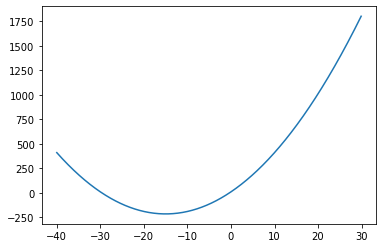

In [5]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

Let's start by a $\gamma$ of 0.1:

In [7]:
x_iters = gradient_descent1d(0.1,f, df)
f_iters = f(np.asarray(x_iters))

This is how the list of `x`s looks like:

In [8]:
x_iters[0:10]

[0,
 -3.0,
 -5.4,
 -7.32,
 -8.856,
 -10.0848,
 -11.06784,
 -11.854272,
 -12.4834176,
 -12.98673408]

And these are how the points of steps of the gradient descend look like:

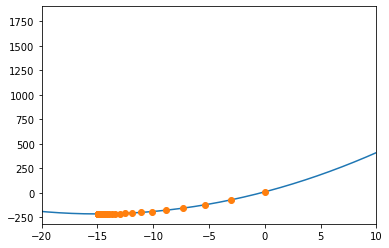

In [9]:
plt.plot(xs, ys)
plt.plot(x_iters, f_iters,'o')

plt.xlim(-20,10)
plt.show()

the $x$ found by the algorithm where the local minimum occurs is quite close to the real one (-15):

In [10]:
x_iters[-1]

-14.98143089941072

If the $\gamma$ is too large the steps jump over the local minimum and the algorithm takes more time to convert:

In [11]:
x_iters = gradient_descent1d(0.95,f, df)
f_iters = f(np.asarray(x_iters))

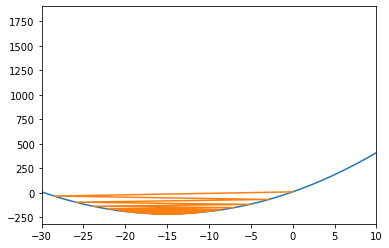

In [12]:
plt.plot(xs, ys)
plt.plot(x_iters, f_iters)

plt.xlim(-30,10)
plt.show()

Of course the algorithm only guarantees to find a local optimum which can not be global. Let's see and example with a function with different optima like $f(x) = \frac{1}{14}(x + 4)(x + 1)(x - 1)(x - 3) + 0.5$ whose gradient is $\nabla f(x) = \frac{1}{14}(4x^{3} + 3x^{2}-26x - 1)$:

In [14]:
f = lambda x: 1/14*(x + 4)*(x + 1)*(x - 1)*(x - 3) + 0.5
df = lambda x: 1/14*(4*x**3 + 3*x**2 -26*x - 1)

xs = np.arange(-4,4,step = 0.1)
ys = f(xs)

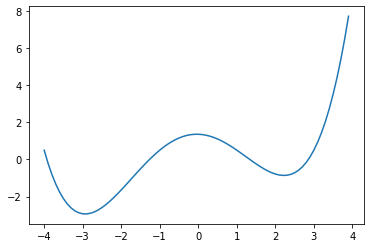

In [15]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

So if we initialize the algorithm at $x = 0$, we get:

In [16]:
x_iters = gradient_descent1d(0.1,f, df)
f_iters = f(np.asarray(x_iters))

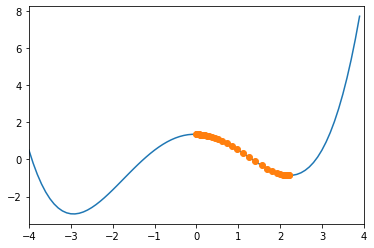

In [17]:
plt.plot(xs, ys)
plt.plot(x_iters, f_iters,'o')

plt.xlim(-4,4)
plt.show()

with the minimum at:

In [18]:
x_iters[-1]

2.2129396999161397

And if we initialize it at -0.1:

In [19]:
x_iters = gradient_descent1d(0.1,f, df,x_0 = -0.1)
f_iters = f(np.asarray(x_iters))

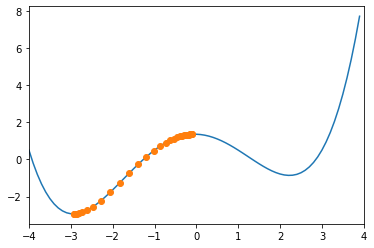

In [20]:
plt.plot(xs, ys)
plt.plot(x_iters, f_iters,'o')

plt.xlim(-4,4)
plt.show()

with the minimum at:

In [21]:
x_iters[-1]

-2.9266667591075115

If we do start from a further point:

In [23]:
x_iters = gradient_descent1d(0.1,f, df,x_0 = -10)
f_iters = f(np.asarray(x_iters))

The algorithm didn't converge


In this case we need to reduce the $\gamma$ a little bit:

In [25]:
x_iters = gradient_descent1d(0.01,f, df,x_0 = -10)
f_iters = f(np.asarray(x_iters))

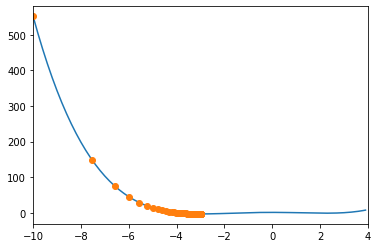

In [26]:
xs = np.arange(-10,4,step = 0.1)
ys = f(xs)

plt.plot(xs, ys)
plt.plot(x_iters, f_iters,'o')

plt.xlim(-10,4)
plt.show()

with the minimum at:

In [27]:
x_iters[-1]

-2.9595584016500007

In the cases of linear and logistic regressions, the functions for which we want to find a minimum are convex and therefore, they only have a minimum which is global. Furthermore, the algorithm is guaranteed to find it.

### Function in many variables

Let's do an example with a function in two variables $f(x,y) = sin(\sqrt{(x^2+ y^2)})$:

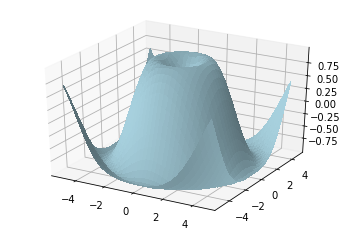

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

f = lambda x, y: math.sin(math.sqrt(x**2 + y**2))


Z = np.asmatrix([[f(x, y) for x in X] for y in Y])
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, color='lightblue',
                       linewidth=0, antialiased=False)

The gradient of that can be computed from the partial derivatives with respect to $x$ and $y$: 

$\frac{\partial{f(x,y)}}{\partial x} = \frac{cos(\sqrt{(x^2+ y^2)})}{\sqrt{(x^2+ y^2)}}x$

$\frac{\partial{f(x,y)}}{\partial y} = \frac{cos(\sqrt{(x^2+ y^2)})}{\sqrt{(x^2+ y^2)}}y$

so $\nabla(f(x,y)) = \frac{cos(\sqrt{(x^2+ y^2)})}{\sqrt{(x^2+ y^2)}}(x,y)$

In [59]:
df = lambda x, y: [dim*(math.cos(math.sqrt(x**2 + y**2))/math.sqrt(x**2 + y**2)) for dim in [x,y]]

We need to modify a little bit the implementation in one variable to allow many:

In [60]:
def next_step(gamma,d_function,x):
    eval_d_function = d_function(*x)
    return [x[i] - gamma*(eval_d_function[i]) for i in range(len(x))]
    

def gradient_descent(gamma,function,d_function,x_0 ,max_steps = 500):
    x_iters = []
    x_n = x_0
    x_n_1 = next_step(gamma,d_function, x_n )
    tol = 10**-4
    i = 0 
    while abs(function(*x_n_1)-function(*x_n))>tol and i<max_steps and function(*x_n_1)!=float("inf") :

        x_iters.append(x_n)
        x_n = x_n_1
        x_n_1 = next_step(gamma,d_function, x_n )
        i+=1
        
    if i>=max_steps or function(*x_n_1)==float("inf"):
        print(i)
        print("The algorithm didn't converge")
        
    return x_iters

Then we initialize the algorithm in the point [0,-2]:

In [86]:
x_iters = gradient_descent(0.1,f, df,[0,-2])
f_iters = ([f(*x) for x in np.asarray(x_iters)])

And visualize the path taken by the algorithm:

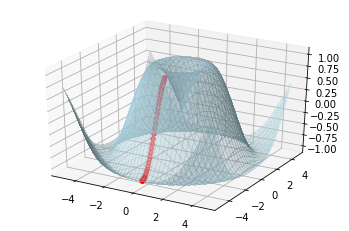

In [87]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter([x[0] for x in x_iters], [x[1] for x in x_iters], np.asarray(f_iters),'o',color = 'red')


ax.plot_surface(X, Y, Z, color='lightblue',
                       linewidth=0, antialiased=False,alpha = 0.3)


plt.show()

In [88]:
f_iters[-1]

-0.9994562216421176

Another different point:

In [81]:
x_iters = gradient_descent(0.1,f, df,[-5,5])
f_iters = ([f(*x) for x in np.asarray(x_iters)])

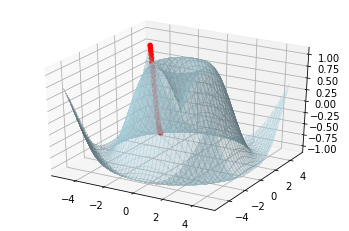

In [82]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')


ax.scatter([x[0] for x in x_iters], [x[1] for x in x_iters], np.asarray(f_iters),'o',color = 'red')


ax.plot_surface(X, Y, Z, color='lightblue',
                       linewidth=0, antialiased=False,alpha = 0.3)


#plt.xlim(0,-5)
plt.show()

In [84]:
f_iters[-1]

-0.9994143029642129

And thhis is what happens when we initialize it close to the hold in the midle:

In [105]:
x_iters = gradient_descent(0.1,f, df,[0.5,0.5])
f_iters = ([f(*x) for x in np.asarray(x_iters)])

500
The algorithm didn't converge


The algorithm does not converge since the gradient is not defined in the hole but it jumps around it:

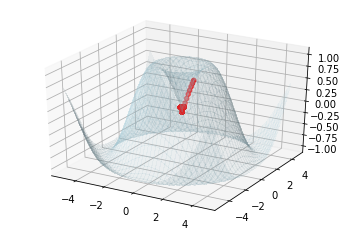

In [111]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')


ax.scatter([x[0] for x in x_iters], [x[1] for x in x_iters], np.asarray(f_iters),'o',color = 'red')


ax.plot_surface(X, Y, Z, color='lightblue',
                       linewidth=0, antialiased=False,alpha = 0.1)


#plt.xlim(0,-5)
plt.show()

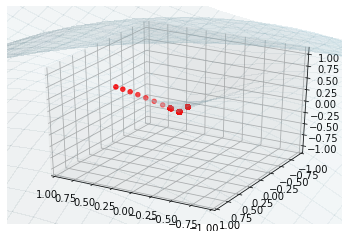

In [117]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')


ax.scatter([x[0] for x in x_iters], [x[1] for x in x_iters], np.asarray(f_iters),'o',color = 'red')


ax.plot_surface(X, Y, Z, color='lightblue',
                       linewidth=0, antialiased=False,alpha = 0.1)


plt.xlim(1,-1)
plt.ylim(1,-1)

plt.show()